In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [2]:
population_model = "PBH-CC-2nd"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_3/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict


{'α': Uniform(minimum=0.0, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'Mf': Uniform(minimum=1.0, maximum=50.0, name='$M_f$', latex_label='$M_f$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

23:26 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-CC-2nd_flatLCDM_3/'
23:26 bilby INFO    : Search parameters:
23:26 bilby INFO    :   α = Uniform(minimum=0.0, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
23:26 bilby INFO    :   Mf = Uniform(minimum=1.0, maximum=50.0, name='$M_f$', latex_label='$M_f$', unit=None, boundary=None)
23:26 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
23:26 bilby INFO    :   H0 = 67.4
23:26 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:139: RuntimeWarning: divide by zero encountered in log
23:29 bilby INFO    : Single likelihood evaluation took 2.073e+00 s


0it [00:00, ?it/s]

23:29 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f68375c1a90>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
23:29 bilby INFO    : Checkpoint every check_point_delta_t = 120s
23:29 bilby INFO    : Using dynesty version 1.0.1
23:29 bilby INFO    : Using the bilby-implemented rwalk samp

517it [38:51,  3.08it/s, bound:0 nc:  2 ncall:1.5e+03 eff:34.6% logz=-2329.22+/-0.17 dlogz:566.015>0.1]     

00:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


945it [42:52,  1.08it/s, bound:0 nc: 34 ncall:3.5e+03 eff:26.8% logz=-1958.83+/-0.16 dlogz:197.606>0.1]

00:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1162it [46:50,  1.15s/it, bound:0 nc: 13 ncall:5.5e+03 eff:21.0% logz=-1910.24+/-0.15 dlogz:149.326>0.1]

00:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1306it [50:50,  1.39s/it, bound:0 nc: 41 ncall:7.6e+03 eff:17.3% logz=-1889.29+/-0.15 dlogz:133.568>0.1]

00:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1366it [52:54,  2.31s/it, bound:0 nc: 15 ncall:8.6e+03 eff:15.9% logz=-1880.22+/-0.16 dlogz:124.368>0.1]

00:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1428it [54:57,  2.75s/it, bound:0 nc: 39 ncall:9.6e+03 eff:14.9% logz=-1871.63+/-0.16 dlogz:115.597>0.1]

00:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1518it [58:58,  1.62s/it, bound:0 nc: 17 ncall:1.2e+04 eff:13.1% logz=-1861.04+/-0.16 dlogz:104.843>0.1]

00:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1600it [1:02:59,  4.20s/it, bound:0 nc: 37 ncall:1.4e+04 eff:11.7% logz=-1851.37+/-0.16 dlogz:95.478>0.1] 

00:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1628it [1:05:06,  7.50s/it, bound:0 nc: 90 ncall:1.5e+04 eff:11.1% logz=-1848.66+/-0.16 dlogz:92.698>0.1]

00:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1682it [1:09:14,  3.54s/it, bound:0 nc: 61 ncall:1.7e+04 eff:10.0% logz=-1843.59+/-0.16 dlogz:87.505>0.1]

00:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1690it [1:11:35, 20.60s/it, bound:1 nc: 55 ncall:1.7e+04 eff:9.9% logz=-1842.96+/-0.16 dlogz:86.861>0.1] 

00:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1753it [1:15:17,  4.68s/it, bound:7 nc: 35 ncall:1.9e+04 eff:9.2% logz=-1837.14+/-0.16 dlogz:80.915>0.1]

00:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1812it [1:19:11,  4.43s/it, bound:14 nc: 36 ncall:2.1e+04 eff:8.6% logz=-1832.74+/-0.16 dlogz:76.381>0.1]

00:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1842it [1:21:17,  4.83s/it, bound:17 nc: 35 ncall:2.2e+04 eff:8.3% logz=-1830.66+/-0.16 dlogz:74.261>0.1]

00:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1898it [1:25:01,  4.37s/it, bound:24 nc: 29 ncall:2.4e+04 eff:7.8% logz=-1826.61+/-0.16 dlogz:70.883>0.1]

00:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1925it [1:27:04,  4.86s/it, bound:27 nc: 36 ncall:2.5e+04 eff:7.6% logz=-1824.54+/-0.16 dlogz:68.762>0.1]

00:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1986it [1:31:02,  4.38s/it, bound:34 nc: 31 ncall:2.8e+04 eff:7.2% logz=-1820.55+/-0.16 dlogz:64.619>0.1]

01:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2016it [1:33:15,  4.68s/it, bound:37 nc: 35 ncall:2.9e+04 eff:7.0% logz=-1818.73+/-0.16 dlogz:62.751>0.1]

01:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2048it [1:35:26,  4.62s/it, bound:41 nc: 39 ncall:3.0e+04 eff:6.9% logz=-1816.57+/-0.16 dlogz:60.527>0.1]

01:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2077it [1:37:31,  4.59s/it, bound:44 nc: 65 ncall:3.1e+04 eff:6.7% logz=-1814.83+/-0.16 dlogz:58.723>0.1]

01:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2104it [1:39:37,  4.71s/it, bound:48 nc: 34 ncall:3.2e+04 eff:6.5% logz=-1813.28+/-0.16 dlogz:57.129>0.1]

01:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2135it [1:41:48,  5.24s/it, bound:51 nc: 69 ncall:3.3e+04 eff:6.4% logz=-1811.62+/-0.16 dlogz:55.395>0.1]

01:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2163it [1:44:00,  5.70s/it, bound:55 nc: 38 ncall:3.4e+04 eff:6.3% logz=-1810.20+/-0.16 dlogz:53.906>0.1]

01:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2191it [1:46:06,  5.66s/it, bound:58 nc: 37 ncall:3.6e+04 eff:6.1% logz=-1808.90+/-0.16 dlogz:52.555>0.1]

01:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2221it [1:48:15,  5.33s/it, bound:62 nc: 31 ncall:3.7e+04 eff:6.0% logz=-1807.33+/-0.16 dlogz:50.927>0.1]

01:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2252it [1:50:20,  4.96s/it, bound:65 nc: 61 ncall:3.8e+04 eff:5.9% logz=-1805.78+/-0.16 dlogz:49.303>0.1]

01:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2283it [1:52:31,  4.82s/it, bound:69 nc: 36 ncall:3.9e+04 eff:5.8% logz=-1804.37+/-0.16 dlogz:47.839>0.1]

01:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2315it [1:54:41,  4.53s/it, bound:72 nc: 40 ncall:4.0e+04 eff:5.7% logz=-1802.64+/-0.17 dlogz:46.062>0.1]

01:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2345it [1:56:51,  4.46s/it, bound:76 nc: 40 ncall:4.1e+04 eff:5.7% logz=-1800.82+/-0.17 dlogz:44.585>0.1]

01:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2377it [1:58:59,  4.87s/it, bound:80 nc: 37 ncall:4.3e+04 eff:5.6% logz=-1799.11+/-0.17 dlogz:42.790>0.1]

01:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2409it [2:01:09,  5.01s/it, bound:83 nc: 40 ncall:4.4e+04 eff:5.5% logz=-1797.57+/-0.17 dlogz:41.583>0.1]

01:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2441it [2:03:23,  5.06s/it, bound:87 nc: 38 ncall:4.5e+04 eff:5.4% logz=-1796.23+/-0.17 dlogz:40.158>0.1]

01:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2473it [2:05:34,  4.90s/it, bound:91 nc: 37 ncall:4.6e+04 eff:5.4% logz=-1794.93+/-0.17 dlogz:38.812>0.1]

01:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2503it [2:07:47,  4.89s/it, bound:94 nc: 36 ncall:4.7e+04 eff:5.3% logz=-1793.44+/-0.17 dlogz:37.376>0.1]

01:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2534it [2:10:02,  4.75s/it, bound:98 nc: 37 ncall:4.8e+04 eff:5.2% logz=-1792.36+/-0.17 dlogz:36.223>0.1]

01:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2565it [2:12:17,  4.56s/it, bound:102 nc: 39 ncall:5.0e+04 eff:5.2% logz=-1791.21+/-0.17 dlogz:35.011>0.1]

01:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2597it [2:14:30,  4.91s/it, bound:105 nc: 37 ncall:5.1e+04 eff:5.1% logz=-1790.18+/-0.17 dlogz:33.918>0.1]

01:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2628it [2:16:44,  5.10s/it, bound:109 nc: 40 ncall:5.2e+04 eff:5.0% logz=-1789.10+/-0.17 dlogz:32.772>0.1]

01:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2659it [2:19:00,  5.13s/it, bound:113 nc: 66 ncall:5.3e+04 eff:5.0% logz=-1788.15+/-0.17 dlogz:31.755>0.1]

01:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2689it [2:21:13,  5.02s/it, bound:116 nc: 69 ncall:5.4e+04 eff:4.9% logz=-1787.03+/-0.17 dlogz:30.586>0.1]

01:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2719it [2:23:28,  4.87s/it, bound:120 nc: 38 ncall:5.6e+04 eff:4.9% logz=-1786.00+/-0.17 dlogz:29.491>0.1]

01:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2749it [2:25:41,  4.70s/it, bound:124 nc: 38 ncall:5.7e+04 eff:4.8% logz=-1785.21+/-0.17 dlogz:28.635>0.1]

01:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2780it [2:27:58,  5.27s/it, bound:127 nc: 37 ncall:5.8e+04 eff:4.8% logz=-1784.34+/-0.17 dlogz:27.701>0.1]

01:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2811it [2:30:16,  5.49s/it, bound:131 nc: 38 ncall:5.9e+04 eff:4.8% logz=-1783.54+/-0.17 dlogz:26.840>0.1]

01:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2840it [2:32:30,  5.52s/it, bound:135 nc: 33 ncall:6.0e+04 eff:4.7% logz=-1782.81+/-0.17 dlogz:26.057>0.1]

02:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2867it [2:34:46,  5.61s/it, bound:138 nc: 37 ncall:6.1e+04 eff:4.7% logz=-1782.07+/-0.17 dlogz:25.263>0.1]

02:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2898it [2:37:00,  5.14s/it, bound:142 nc: 40 ncall:6.3e+04 eff:4.6% logz=-1781.28+/-0.17 dlogz:24.407>0.1]

02:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2928it [2:39:18,  5.00s/it, bound:146 nc: 38 ncall:6.4e+04 eff:4.6% logz=-1780.61+/-0.17 dlogz:23.681>0.1]

02:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2958it [2:41:36,  4.88s/it, bound:149 nc: 78 ncall:6.5e+04 eff:4.6% logz=-1779.82+/-0.17 dlogz:22.828>0.1]

02:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2988it [2:43:50,  5.37s/it, bound:153 nc: 36 ncall:6.6e+04 eff:4.5% logz=-1778.86+/-0.17 dlogz:21.816>0.1]

02:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3017it [2:46:06,  5.67s/it, bound:156 nc: 38 ncall:6.7e+04 eff:4.5% logz=-1778.09+/-0.17 dlogz:20.980>0.1]

02:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3045it [2:48:25,  5.97s/it, bound:160 nc:107 ncall:6.8e+04 eff:4.4% logz=-1777.41+/-0.17 dlogz:20.246>0.1]

02:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3076it [2:50:42,  5.56s/it, bound:164 nc: 39 ncall:7.0e+04 eff:4.4% logz=-1776.67+/-0.17 dlogz:19.438>0.1]

02:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3106it [2:52:58,  5.30s/it, bound:167 nc: 36 ncall:7.1e+04 eff:4.4% logz=-1775.98+/-0.17 dlogz:18.689>0.1]

02:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3136it [2:55:17,  5.15s/it, bound:171 nc: 39 ncall:7.2e+04 eff:4.4% logz=-1775.23+/-0.18 dlogz:17.884>0.1]

02:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3168it [2:57:30,  4.70s/it, bound:174 nc: 35 ncall:7.3e+04 eff:4.3% logz=-1774.61+/-0.17 dlogz:17.186>0.1]

02:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3199it [2:59:47,  5.30s/it, bound:178 nc: 37 ncall:7.4e+04 eff:4.3% logz=-1774.02+/-0.17 dlogz:16.538>0.1]

02:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3230it [3:02:05,  5.55s/it, bound:182 nc: 38 ncall:7.5e+04 eff:4.3% logz=-1773.42+/-0.17 dlogz:15.876>0.1]

02:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3262it [3:04:23,  5.48s/it, bound:185 nc: 36 ncall:7.7e+04 eff:4.3% logz=-1772.88+/-0.17 dlogz:15.268>0.1]

02:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3294it [3:06:39,  5.29s/it, bound:189 nc: 35 ncall:7.8e+04 eff:4.2% logz=-1772.37+/-0.17 dlogz:14.692>0.1]

02:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3324it [3:09:03,  5.36s/it, bound:193 nc: 78 ncall:7.9e+04 eff:4.2% logz=-1771.89+/-0.17 dlogz:14.154>0.1]

02:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3352it [3:11:21,  5.34s/it, bound:196 nc: 36 ncall:8.0e+04 eff:4.2% logz=-1771.46+/-0.18 dlogz:13.673>0.1]

02:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3381it [3:13:43,  5.20s/it, bound:200 nc: 38 ncall:8.1e+04 eff:4.2% logz=-1771.05+/-0.18 dlogz:13.206>0.1]

02:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3412it [3:16:06,  4.91s/it, bound:204 nc: 33 ncall:8.2e+04 eff:4.1% logz=-1770.64+/-0.18 dlogz:12.731>0.1]

02:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3443it [3:18:30,  5.39s/it, bound:207 nc: 38 ncall:8.4e+04 eff:4.1% logz=-1770.26+/-0.18 dlogz:12.284>0.1]

02:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3473it [3:20:47,  5.43s/it, bound:211 nc: 34 ncall:8.5e+04 eff:4.1% logz=-1769.89+/-0.18 dlogz:11.859>0.1]

02:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3503it [3:23:07,  5.39s/it, bound:215 nc: 37 ncall:8.6e+04 eff:4.1% logz=-1769.56+/-0.18 dlogz:11.461>0.1]

02:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3535it [3:25:27,  5.08s/it, bound:219 nc: 73 ncall:8.7e+04 eff:4.1% logz=-1769.19+/-0.18 dlogz:11.166>0.1]

02:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3564it [3:27:50,  5.11s/it, bound:222 nc: 37 ncall:8.8e+04 eff:4.0% logz=-1768.86+/-0.18 dlogz:10.777>0.1]

02:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3594it [3:30:16,  5.76s/it, bound:226 nc: 77 ncall:9.0e+04 eff:4.0% logz=-1768.53+/-0.18 dlogz:10.384>0.1]

02:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3624it [3:32:39,  5.89s/it, bound:230 nc: 39 ncall:9.1e+04 eff:4.0% logz=-1768.19+/-0.18 dlogz:9.984>0.1] 

03:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3655it [3:35:00,  5.57s/it, bound:234 nc: 40 ncall:9.2e+04 eff:4.0% logz=-1767.86+/-0.18 dlogz:9.601>0.1]

03:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3687it [3:37:22,  5.23s/it, bound:237 nc: 36 ncall:9.3e+04 eff:4.0% logz=-1767.54+/-0.18 dlogz:9.211>0.1]

03:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3717it [3:39:44,  5.14s/it, bound:241 nc: 37 ncall:9.4e+04 eff:3.9% logz=-1767.26+/-0.18 dlogz:8.872>0.1]

03:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3749it [3:42:04,  4.77s/it, bound:245 nc: 36 ncall:9.6e+04 eff:3.9% logz=-1766.96+/-0.18 dlogz:8.510>0.1]

03:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3781it [3:44:29,  5.29s/it, bound:248 nc: 39 ncall:9.7e+04 eff:3.9% logz=-1766.67+/-0.18 dlogz:8.177>0.1]

03:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3813it [3:46:51,  5.37s/it, bound:252 nc: 35 ncall:9.8e+04 eff:3.9% logz=-1766.41+/-0.18 dlogz:7.849>0.1]

03:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3844it [3:49:14,  5.36s/it, bound:256 nc: 40 ncall:9.9e+04 eff:3.9% logz=-1766.17+/-0.18 dlogz:7.550>0.1]

03:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3875it [3:51:36,  5.20s/it, bound:260 nc: 38 ncall:1.0e+05 eff:3.9% logz=-1765.96+/-0.18 dlogz:7.273>0.1]

03:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3907it [3:54:02,  4.98s/it, bound:264 nc: 39 ncall:1.0e+05 eff:3.8% logz=-1765.74+/-0.18 dlogz:6.990>0.1]

03:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3934it [3:56:25,  5.82s/it, bound:268 nc: 38 ncall:1.0e+05 eff:3.8% logz=-1765.55+/-0.18 dlogz:6.753>0.1]

03:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3965it [3:58:50,  5.80s/it, bound:272 nc: 35 ncall:1.0e+05 eff:3.8% logz=-1765.35+/-0.18 dlogz:6.486>0.1]

03:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3996it [4:01:16,  5.63s/it, bound:275 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1765.15+/-0.18 dlogz:6.222>0.1]

03:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4027it [4:03:42,  5.39s/it, bound:279 nc:118 ncall:1.1e+05 eff:3.8% logz=-1764.95+/-0.18 dlogz:5.980>0.1]

03:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4056it [4:06:03,  5.17s/it, bound:283 nc: 37 ncall:1.1e+05 eff:3.8% logz=-1764.77+/-0.18 dlogz:5.745>0.1]

03:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4086it [4:08:27,  5.67s/it, bound:287 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1764.59+/-0.18 dlogz:5.505>0.1]

03:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4118it [4:10:51,  5.63s/it, bound:291 nc: 35 ncall:1.1e+05 eff:3.7% logz=-1764.41+/-0.18 dlogz:5.262>0.1]

03:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4147it [4:13:16,  5.76s/it, bound:295 nc: 39 ncall:1.1e+05 eff:3.7% logz=-1764.25+/-0.18 dlogz:5.052>0.1]

03:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4178it [4:15:41,  5.47s/it, bound:299 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1764.10+/-0.18 dlogz:4.839>0.1]

03:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4208it [4:18:05,  5.24s/it, bound:303 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1763.96+/-0.18 dlogz:4.640>0.1]

03:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
03:47 bilby INFO    : Writing 102 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4237it [4:20:38,  5.99s/it, bound:307 nc: 38 ncall:1.2e+05 eff:3.7% logz=-1763.83+/-0.18 dlogz:4.453>0.1]

03:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
03:50 bilby INFO    : Writing 102 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4267it [4:22:59,  5.91s/it, bound:311 nc: 39 ncall:1.2e+05 eff:3.7% logz=-1763.70+/-0.18 dlogz:4.267>0.1]

03:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
03:52 bilby INFO    : Writing 101 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4299it [4:25:26,  5.52s/it, bound:315 nc: 35 ncall:1.2e+05 eff:3.7% logz=-1763.57+/-0.18 dlogz:4.073>0.1]

03:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
03:55 bilby INFO    : Writing 111 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4327it [4:27:51,  5.51s/it, bound:319 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.46+/-0.18 dlogz:3.910>0.1]

03:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
03:57 bilby INFO    : Writing 110 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4358it [4:30:14,  5.03s/it, bound:323 nc: 78 ncall:1.2e+05 eff:3.6% logz=-1763.35+/-0.18 dlogz:3.738>0.1]

03:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
03:59 bilby INFO    : Writing 123 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4390it [4:32:42,  5.38s/it, bound:327 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.24+/-0.18 dlogz:3.567>0.1]

04:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:02 bilby INFO    : Writing 140 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4422it [4:35:08,  5.33s/it, bound:331 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.13+/-0.18 dlogz:3.404>0.1]

04:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:04 bilby INFO    : Writing 141 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4453it [4:37:36,  5.26s/it, bound:335 nc: 39 ncall:1.2e+05 eff:3.6% logz=-1763.03+/-0.18 dlogz:3.249>0.1]

04:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:07 bilby INFO    : Writing 148 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4484it [4:39:59,  4.98s/it, bound:339 nc: 38 ncall:1.3e+05 eff:3.6% logz=-1762.94+/-0.18 dlogz:3.098>0.1]

04:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:09 bilby INFO    : Writing 157 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4514it [4:42:23,  5.50s/it, bound:343 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1762.85+/-0.18 dlogz:2.957>0.1]

04:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:12 bilby INFO    : Writing 163 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4546it [4:44:48,  5.44s/it, bound:347 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1762.76+/-0.18 dlogz:2.811>0.1]

04:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:14 bilby INFO    : Writing 175 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4578it [4:47:12,  5.20s/it, bound:351 nc: 37 ncall:1.3e+05 eff:3.5% logz=-1762.67+/-0.18 dlogz:2.672>0.1]

04:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:16 bilby INFO    : Writing 205 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4607it [4:49:35,  5.15s/it, bound:355 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1762.60+/-0.18 dlogz:2.550>0.1]

04:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:19 bilby INFO    : Writing 200 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4637it [4:51:59,  5.66s/it, bound:359 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1762.53+/-0.18 dlogz:2.427>0.1]

04:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:21 bilby INFO    : Writing 217 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4666it [4:54:23,  5.82s/it, bound:363 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1762.46+/-0.18 dlogz:2.313>0.1]

04:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:24 bilby INFO    : Writing 235 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4697it [4:56:44,  5.44s/it, bound:367 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1762.39+/-0.18 dlogz:2.195>0.1]

04:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:26 bilby INFO    : Writing 247 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4726it [4:59:06,  5.35s/it, bound:370 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1762.33+/-0.18 dlogz:2.090>0.1]

04:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:28 bilby INFO    : Writing 248 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4755it [5:01:30,  5.19s/it, bound:374 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1762.27+/-0.18 dlogz:1.988>0.1]

04:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:31 bilby INFO    : Writing 287 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4785it [5:03:51,  5.55s/it, bound:378 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1762.21+/-0.18 dlogz:1.885>0.1]

04:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:33 bilby INFO    : Writing 317 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4814it [5:06:13,  5.65s/it, bound:382 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1762.15+/-0.18 dlogz:1.790>0.1]

04:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:35 bilby INFO    : Writing 311 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4844it [5:08:34,  5.41s/it, bound:386 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.10+/-0.18 dlogz:1.696>0.1]

04:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:38 bilby INFO    : Writing 288 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4875it [5:10:58,  5.08s/it, bound:390 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.04+/-0.18 dlogz:1.603>0.1]

04:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:40 bilby INFO    : Writing 362 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4906it [5:13:19,  5.43s/it, bound:394 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1761.99+/-0.18 dlogz:1.514>0.1]

04:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:42 bilby INFO    : Writing 408 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4936it [5:15:41,  5.56s/it, bound:398 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1761.95+/-0.18 dlogz:1.432>0.1]

04:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:45 bilby INFO    : Writing 380 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4967it [5:18:01,  5.28s/it, bound:402 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.90+/-0.18 dlogz:1.351>0.1]

04:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:47 bilby INFO    : Writing 411 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4997it [5:20:24,  5.16s/it, bound:406 nc: 80 ncall:1.5e+05 eff:3.4% logz=-1761.86+/-0.18 dlogz:1.276>0.1]

04:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:50 bilby INFO    : Writing 452 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5027it [5:22:44,  4.92s/it, bound:410 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.82+/-0.18 dlogz:1.204>0.1]

04:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:52 bilby INFO    : Writing 488 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5055it [5:25:05,  5.57s/it, bound:414 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.78+/-0.18 dlogz:1.140>0.1]

04:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:54 bilby INFO    : Writing 529 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5084it [5:27:25,  5.62s/it, bound:418 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.75+/-0.18 dlogz:1.078>0.1]

04:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:57 bilby INFO    : Writing 520 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5114it [5:29:46,  5.36s/it, bound:422 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.71+/-0.18 dlogz:1.016>0.1]

04:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
04:59 bilby INFO    : Writing 553 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5145it [5:32:05,  4.97s/it, bound:426 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.68+/-0.18 dlogz:0.956>0.1]

05:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:01 bilby INFO    : Writing 598 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5177it [5:34:25,  5.28s/it, bound:430 nc: 40 ncall:1.5e+05 eff:3.3% logz=-1761.64+/-0.18 dlogz:0.897>0.1]

05:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:04 bilby INFO    : Writing 617 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5207it [5:36:44,  5.43s/it, bound:434 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.61+/-0.18 dlogz:0.845>0.1]

05:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:06 bilby INFO    : Writing 677 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5239it [5:39:05,  5.17s/it, bound:438 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.58+/-0.18 dlogz:0.792>0.1]

05:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:08 bilby INFO    : Writing 755 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5270it [5:41:25,  4.96s/it, bound:442 nc: 80 ncall:1.6e+05 eff:3.3% logz=-1761.55+/-0.18 dlogz:0.744>0.1]

05:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:11 bilby INFO    : Writing 759 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5300it [5:43:43,  4.78s/it, bound:446 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.53+/-0.18 dlogz:0.700>0.1]

05:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:13 bilby INFO    : Writing 836 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5332it [5:46:03,  5.10s/it, bound:450 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.50+/-0.18 dlogz:0.656>0.1]

05:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:15 bilby INFO    : Writing 886 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5362it [5:48:23,  5.24s/it, bound:454 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.48+/-0.18 dlogz:0.616>0.1]

05:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:18 bilby INFO    : Writing 919 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5392it [5:50:43,  5.14s/it, bound:458 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.46+/-0.18 dlogz:0.580>0.1]

05:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:20 bilby INFO    : Writing 1001 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5424it [5:53:02,  4.78s/it, bound:462 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.44+/-0.18 dlogz:0.543>0.1]

05:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:22 bilby INFO    : Writing 1082 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5453it [5:55:21,  5.36s/it, bound:466 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.42+/-0.18 dlogz:0.511>0.1]

05:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:25 bilby INFO    : Writing 1113 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5485it [5:57:41,  5.26s/it, bound:470 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.40+/-0.18 dlogz:0.478>0.1]

05:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:27 bilby INFO    : Writing 1152 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5514it [5:59:58,  5.29s/it, bound:473 nc: 80 ncall:1.7e+05 eff:3.3% logz=-1761.38+/-0.18 dlogz:0.450>0.1]

05:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:29 bilby INFO    : Writing 1198 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5546it [6:02:17,  4.87s/it, bound:477 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.36+/-0.18 dlogz:0.421>0.1]

05:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:31 bilby INFO    : Writing 1364 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5577it [6:04:36,  5.33s/it, bound:481 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.35+/-0.18 dlogz:0.395>0.1]

05:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:34 bilby INFO    : Writing 1428 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5609it [6:06:53,  5.29s/it, bound:485 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.33+/-0.18 dlogz:0.370>0.1]

05:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:36 bilby INFO    : Writing 1553 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5640it [6:09:10,  5.19s/it, bound:489 nc: 40 ncall:1.7e+05 eff:3.2% logz=-1761.31+/-0.18 dlogz:0.347>0.1]

05:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:38 bilby INFO    : Writing 1602 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5672it [6:11:29,  4.91s/it, bound:493 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.30+/-0.18 dlogz:0.324>0.1]

05:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:41 bilby INFO    : Writing 1584 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5703it [6:13:47,  4.70s/it, bound:497 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.29+/-0.18 dlogz:0.304>0.1]

05:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:43 bilby INFO    : Writing 1590 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5735it [6:16:04,  5.01s/it, bound:501 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.27+/-0.18 dlogz:0.287>0.1]

05:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:45 bilby INFO    : Writing 1653 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5765it [6:18:22,  5.19s/it, bound:505 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.26+/-0.18 dlogz:0.271>0.1]

05:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:48 bilby INFO    : Writing 1601 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5794it [6:20:40,  5.21s/it, bound:509 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.25+/-0.18 dlogz:0.256>0.1]

05:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:50 bilby INFO    : Writing 1577 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5825it [6:22:55,  4.84s/it, bound:513 nc: 80 ncall:1.8e+05 eff:3.2% logz=-1761.24+/-0.18 dlogz:0.240>0.1]

05:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:52 bilby INFO    : Writing 1589 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5856it [6:25:10,  5.18s/it, bound:517 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.23+/-0.18 dlogz:0.225>0.1]

05:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:54 bilby INFO    : Writing 1590 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5887it [6:27:26,  5.22s/it, bound:521 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.22+/-0.19 dlogz:0.211>0.1]

05:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:57 bilby INFO    : Writing 1624 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5918it [6:29:43,  5.11s/it, bound:525 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.21+/-0.19 dlogz:0.198>0.1]

05:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
05:59 bilby INFO    : Writing 1623 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5950it [6:32:00,  4.78s/it, bound:529 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.20+/-0.19 dlogz:0.185>0.1]

06:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:01 bilby INFO    : Writing 1603 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5980it [6:34:17,  5.36s/it, bound:533 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.19+/-0.19 dlogz:0.174>0.1]

06:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:03 bilby INFO    : Writing 1596 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6012it [6:36:32,  5.26s/it, bound:537 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.19+/-0.19 dlogz:0.163>0.1]

06:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:06 bilby INFO    : Writing 1589 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6044it [6:38:48,  5.06s/it, bound:541 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.18+/-0.19 dlogz:0.152>0.1]

06:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:08 bilby INFO    : Writing 1582 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6075it [6:41:03,  4.86s/it, bound:545 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.17+/-0.19 dlogz:0.143>0.1]

06:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:10 bilby INFO    : Writing 1614 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6107it [6:43:19,  4.55s/it, bound:549 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.16+/-0.19 dlogz:0.134>0.1]

06:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:12 bilby INFO    : Writing 1611 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6137it [6:45:34,  5.03s/it, bound:553 nc: 38 ncall:1.9e+05 eff:3.2% logz=-1761.16+/-0.19 dlogz:0.126>0.1]

06:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:15 bilby INFO    : Writing 1582 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6169it [6:47:49,  4.99s/it, bound:557 nc: 40 ncall:2.0e+05 eff:3.2% logz=-1761.15+/-0.19 dlogz:0.118>0.1]

06:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:17 bilby INFO    : Writing 1623 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6200it [6:50:04,  4.89s/it, bound:561 nc: 40 ncall:2.0e+05 eff:3.1% logz=-1761.15+/-0.19 dlogz:0.110>0.1]

06:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:19 bilby INFO    : Writing 1578 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6231it [6:52:22,  4.73s/it, bound:565 nc: 40 ncall:2.0e+05 eff:3.1% logz=-1761.14+/-0.19 dlogz:0.104>0.1]

06:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:22 bilby INFO    : Writing 1588 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6248it [6:52:24,  3.34s/it, bound:567 nc:  1 ncall:2.0e+05 eff:3.1% logz=-1761.14+/-0.19 dlogz:0.100>0.1]

06:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_resume.pickle
06:22 bilby INFO    : Writing 1612 current samples to H0_GWTC-3_PBH-CC-2nd_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
06:22 bilby INFO    : Starting to close worker pool.
06:22 bilby INFO    : Finished closing worker pool.


6248it [6:52:27,  3.96s/it, bound:567 nc:  1 ncall:2.0e+05 eff:3.4% logz=-1761.05+/-0.19 dlogz:0.000>0.1]



06:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
06:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
06:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
06:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
06:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
06:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
06:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
06:22 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
06:22 bilby WARNING : Multiple likelihood matches found between 

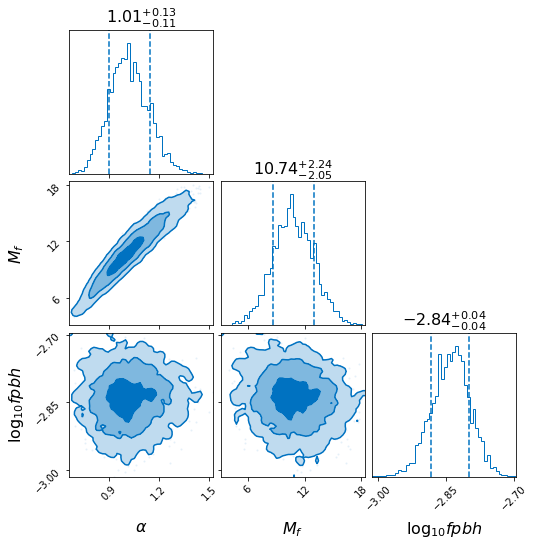

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=120)
result.plot_corner()


In [2]:
import numpy as np
np.exp(-1055.437-(-1055.587))

1.1618342427283888

In [3]:
10**(-2.8)

0.001584893192461114

In [3]:
import matplotlib.lines as mlines

outdir1 = "H0_GWTC-3_PBH-CC-1st_flatLCDM_4/"
outdir2 = "H0_GWTC-3_PBH-CC-2nd_flatLCDM_3/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)

In [4]:
posteriors1

array([[ 1.32155872, 16.38637663, -2.72906441],
       [ 0.70489379,  5.49571921, -2.73993761],
       [ 1.19183653, 15.04361245, -2.75544969],
       ...,
       [ 1.00042749, 10.81078152, -2.83689885],
       [ 0.99917988, 10.72761112, -2.836352  ],
       [ 0.99139852, 10.64439881, -2.83532712]])

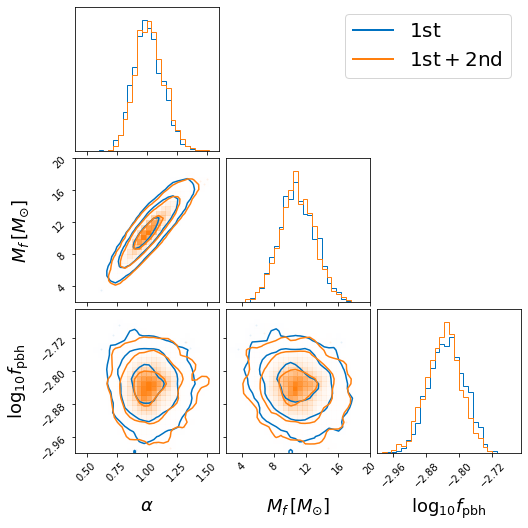

In [25]:
fig = corner.corner(posteriors1, bins=30, smooth=0.9, color='#0072C1', labels=[r"$\alpha$", r"$M_f\, [M_{\odot}]$", r"$\log_{10}f_\mathrm{pbh}$"],
                    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), plot_density=True, plot_datapoints=True, fill_contours=False,
                    show_titles=False, title_kwargs={"fontsize": 18}, label_kwargs=dict(fontsize=18), range=((0.4, 1.6), (2, 20), (-3, -2.65)))

corner.corner(posteriors2, bins=30, smooth=0.9, color='#FF7F0E', labels=[r"$\alpha$", r"$M_f\, [M_{\odot}]$", r"$\log_{10}f_\mathrm{pbh}$"],
              levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), plot_density=True, plot_datapoints=True, fill_contours=False,
              show_titles=False, title_kwargs={"fontsize": 18}, label_kwargs=dict(fontsize=18), range=((0.4, 1.6), (2, 20), (-3, -2.65)), fig=fig)

blue_line = mlines.Line2D([], [], color='#0072C1', lw=2, label=r'$\rm{1st}$')
orange_line = mlines.Line2D([], [], color='#FF7F0E',
                            lw=2, label=r'$\rm{1st+2nd}$')
plt.legend(handles=[blue_line, orange_line], bbox_to_anchor=(
    1, 3.12), loc='upper right', fontsize=20)  # prop={'size': 8})
plt.savefig("../latex/post-CC.pdf")
plt.show()


In [26]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)

In [27]:
posts = posteriors2[:, 0]
get_credibles(posts)

(1.0179097605577898, 0.21584254154525007, 0.18485592640603787)

In [28]:
posts = posteriors2[:, 1]
get_credibles(posts)

(10.838450953943044, 3.7283861831902794, 3.5752728646645764)

In [29]:
posts = posteriors2[:, 2]
get_credibles(posts)

(-2.8372883027907765, 0.06703391804444525, 0.0738219396282207)